**Song Recommendation **


In [206]:
import numpy as np
import pandas as pd

In [207]:
from sklearn.model_selection import train_test_split

In [208]:
#loading dataset
songs= pd.read_csv('tcc_ceds_music.csv')

In [259]:
X = songs[['len']]
y=songs[['track_name','artist_name','genre','lyrics','topic']]

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [261]:
songs.head(1)

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.13711,sadness,1.0


In [262]:
songs.shape

(28372, 31)

In [263]:
songs.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'],
      dtype='object')

In [264]:
songs.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
28367    False
28368    False
28369    False
28370    False
28371    False
Length: 28372, dtype: bool

In [265]:
songs.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Unnamed: 0  artist_name  track_name  release_date  genre  lyrics  \
0           False        False       False         False  False   False   
1           False        False       False         False  False   False   
2           False        False       False         False  False   False   
3           False        False       False         False  False   False   
4           False        False       False         False  False   False   
...           ...          ...         ...           ...    ...     ...   
28367       False        False       False         False  False   False   
28368       False        False       False         False  False   False   
28369       False        False       False         False  False   False   
28370       False        False       False         False  False   False   
28371       False        False       False         False  False   False   

         len  dating  violence  world

> **Data visualization**

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: >

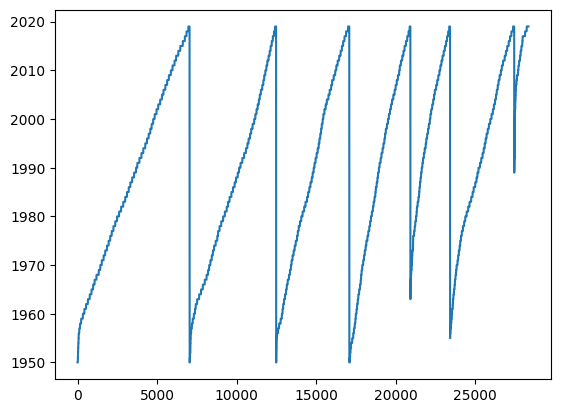

In [267]:
songs['release_date'].plot.line()

<AxesSubplot: xlabel='genre', ylabel='release_date'>

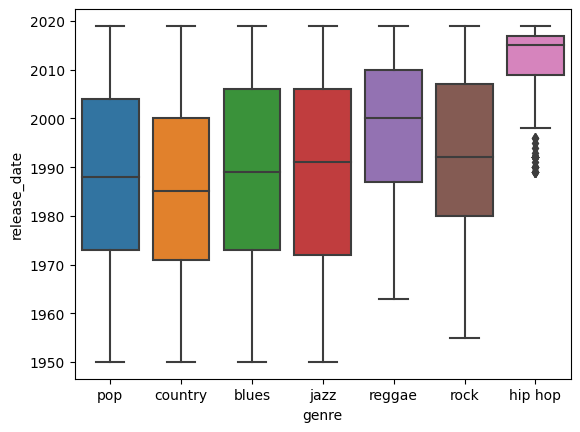

In [268]:
df = songs[songs.genre.isin(songs.genre.value_counts().index)]

sns.boxplot(
    x='genre',
    y='release_date',
    data=df
)

<AxesSubplot: xlabel='shake the audience', ylabel='release_date'>

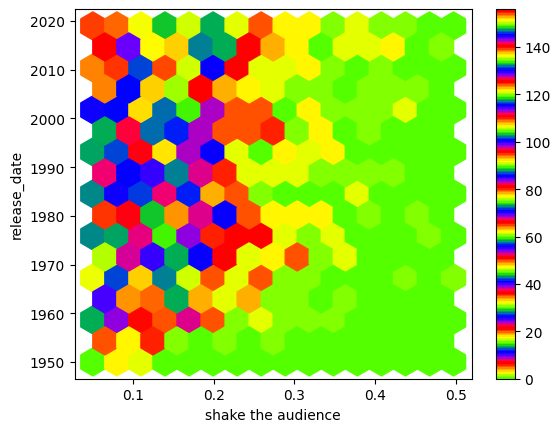

In [269]:
songs[songs['shake the audience'] > 0.05].plot.hexbin(x='shake the audience', y='release_date', gridsize=15,cmap='prism_r')

<AxesSubplot: xlabel='sadness', ylabel='Density'>

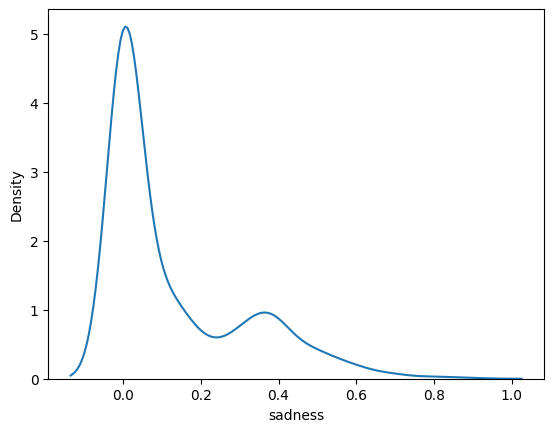

In [270]:
sns.kdeplot(songs['sadness'].sample(1000))

<AxesSubplot: xlabel='danceability', ylabel='release_date'>

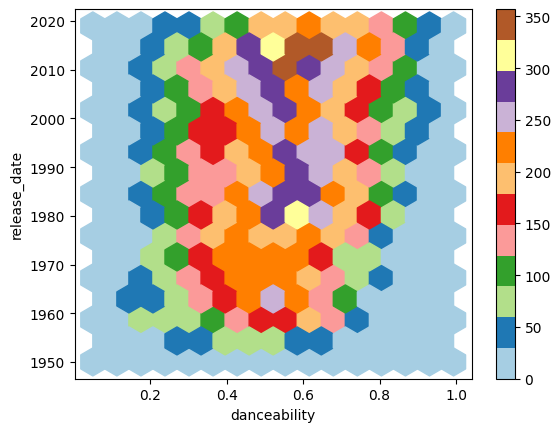

In [271]:
songs[songs['danceability'] > 0.05].plot.hexbin(x='danceability', y='release_date', gridsize=15,cmap='Paired')

<AxesSubplot: xlabel='loudness', ylabel='release_date'>

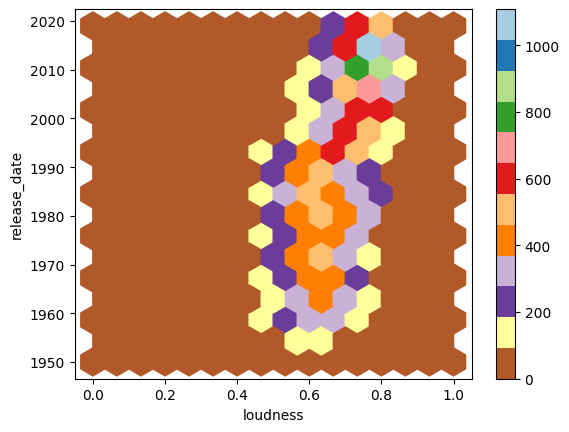

In [272]:
songs.plot.hexbin(x='loudness', y='release_date', gridsize=15,cmap='Paired_r')

<AxesSubplot: xlabel='acousticness', ylabel='release_date'>

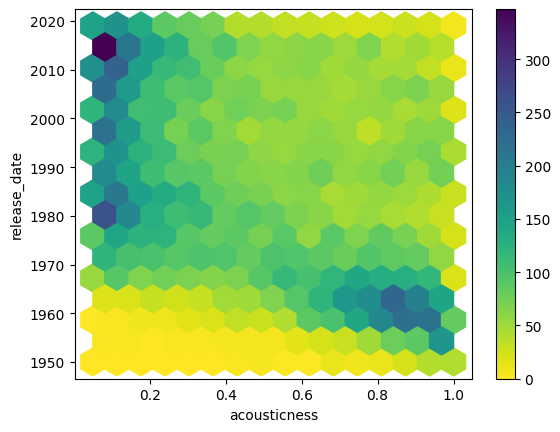

In [273]:
songs[songs['acousticness'] > 0.05].plot.hexbin(x='acousticness', y='release_date', gridsize=15,cmap='viridis_r')

<AxesSubplot: >

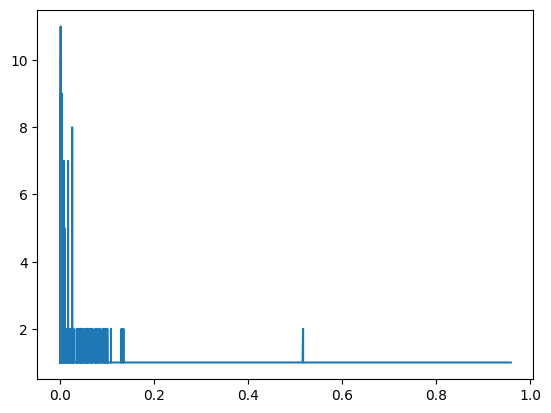

In [274]:
songs['feelings'].value_counts().sort_index().plot.line()

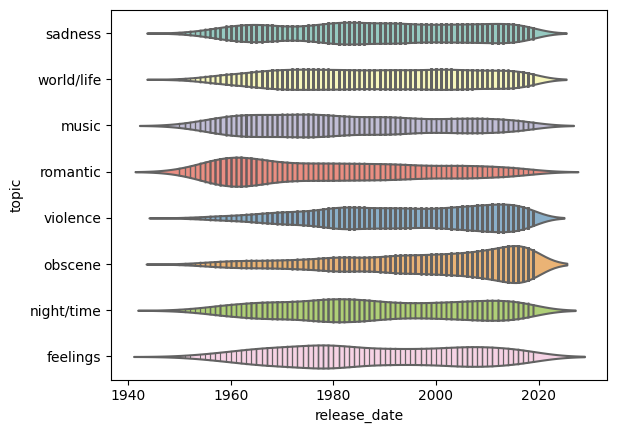

In [275]:
ax = sns.violinplot(
                    x='release_date',
                    y='topic',
                    data=songs[songs.topic.isin(songs.topic.value_counts().index)],
                    #scale="count",
                    palette="Set3",
                    inner='stick'
                   )

We wont be using all the columns for recommendation as it is content based so we will be taking only 'artist_name', 'track_name', 'genre', 'lyrics', 'topic' columns

In [276]:
songs_cpy = songs[['artist_name', 'track_name', 'genre', 'lyrics', 'topic']]

While working on large dataset using its copy is useful

In [277]:
songs_cpy.columns

Index(['artist_name', 'track_name', 'genre', 'lyrics', 'topic'], dtype='object')

In [278]:
import ast

In [279]:
y_test.head(2)

,track_name,artist_name,genre,lyrics,topic
27369,velvet light,jakob ogawa,rock,mind fade pink cashmere summer nights summer n...,sadness
26302,"andy, you're a star",the killers,rock,field remember incredible shut shut yeah field...,violence


In [280]:
y_test['genre'].unique()

array(['rock', 'pop', 'jazz', 'country', 'blues', 'reggae', 'hip hop'],
      dtype=object)

In [281]:
y_test['lyrics'].head(2)

27369    mind fade pink cashmere summer nights summer n...
26302    field remember incredible shut shut yeah field...
Name: lyrics, dtype: object

In [282]:
y_test['artist_name'].unique()

array(['jakob ogawa', 'the killers', 'wings', ..., 'benny berigan',
       'kaleidoscope', 'augustus pablo'], dtype=object)

In [283]:
y_test['topic'].unique()

array(['sadness', 'violence', 'feelings', 'music', 'obscene', 'romantic',
       'world/life', 'night/time'], dtype=object)

In [284]:
##y_test['track_name'].unique()

In [285]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8512 entries, 27369 to 15426
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   track_name   8512 non-null   object
 1   artist_name  8512 non-null   object
 2   genre        8512 non-null   object
 3   lyrics       8512 non-null   object
 4   topic        8512 non-null   object
dtypes: object(5)
memory usage: 399.0+ KB


In [286]:
y_test.sample(5)

,track_name,artist_name,genre,lyrics,topic
13551,everything will be alright,j.j. cale,blues,hassle night fuss fight talk start walk walk n...,night/time
23991,the dirty jobs,the who,rock,look pig usually okay reveal dig careful get p...,world/life
13310,rock me baby,blue cheer,blues,whew whoa alright wanna night long alright sla...,night/time
19462,big and bad,big bad voodoo daddy,jazz,yeah like wild train wild steam goin like see ...,violence
6290,3005,childish gambino,pop,matter fuck niggas right okay hold minute good...,obscene


In [287]:
y_test['tags'] =   y_test['topic']+" "+y_test['genre'] + " "+y_test['lyrics'] +" "+ y_test['artist_name']

In [288]:
new = y_test.drop(columns=['topic','genre','lyrics','artist_name'])

In [289]:
y_test['tags'].head(2)

27369    sadness rock mind fade pink cashmere summer ni...
26302    violence rock field remember incredible shut s...
Name: tags, dtype: object

In [290]:
new.head()

,track_name,tags
27369,velvet light,sadness rock mind fade pink cashmere summer ni...
26302,"andy, you're a star",violence rock field remember incredible shut s...
2325,with a little luck,feelings pop little luck help damn thing work ...
20415,voodoo mon amour,sadness jazz insert needle break stand fall co...
10154,gulf coast highway (with willie nelson),music country gulf coast highway work rail wor...


In [291]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')

In [292]:
vector = cv.fit_transform(new['tags']).toarray()

In [293]:
vector.shape

(8512, 5000)

In [294]:
from sklearn.metrics.pairwise import cosine_similarity

In [295]:
similarity=cosine_similarity(vector)

In [296]:
similarity

array([[1.        , 0.0140859 , 0.        , ..., 0.        , 0.02307351,
        0.        ],
       [0.0140859 , 1.        , 0.00926999, ..., 0.15032921, 0.0075836 ,
        0.05536755],
       [0.        , 0.00926999, 1.        , ..., 0.00627098, 0.07465849,
        0.07126939],
       ...,
       [0.        , 0.15032921, 0.00627098, ..., 1.        , 0.03420108,
        0.02853723],
       [0.02307351, 0.0075836 , 0.07465849, ..., 0.03420108, 1.        ,
        0.03023173],
       [0.        , 0.05536755, 0.07126939, ..., 0.02853723, 0.03023173,
        1.        ]])

In [297]:
similarity.shape

(8512, 8512)

In [298]:
def recommend_song(song):
    index = new[new['track_name'] == song].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])[1:6]
    for i in distances:
        print(new.iloc[i[0]].track_name)

In [302]:
recommend_song('patricia')

miss alissa
deja voodoo
minnie the moocher
let it be me
what's next?
